Precisión del modelo: 1.00


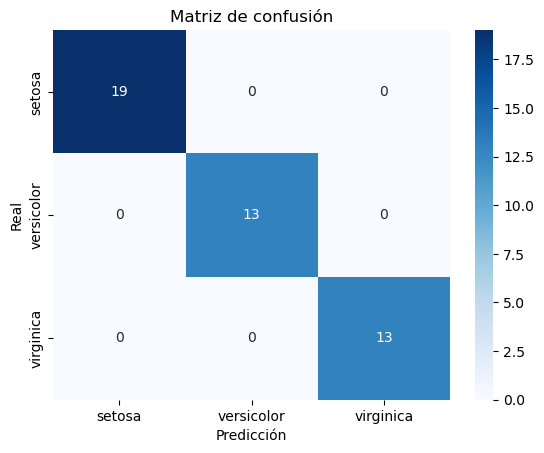

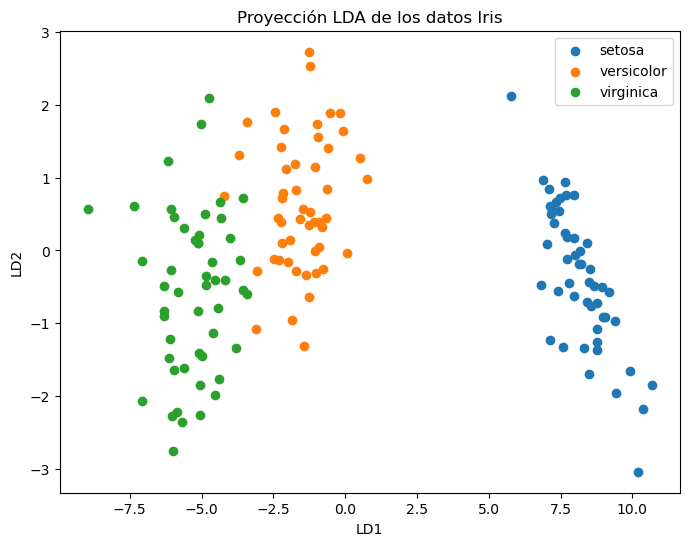

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
iris = load_iris()
X = iris.data  # características (medidas de las flores)
y = iris.target  # clases (tipo de flor)



# 2. Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 4. Predecir
y_pred = lda.predict(X_test)

# 5. Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

# 7. Visualizar proyección LDA en 2D
X_lda = lda.transform(X)
plt.figure(figsize=(8,6))
for i, target in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1] if X_lda.shape[1] > 1 else [0]*sum(y == i), label=target)
plt.xlabel("LD1")
if X_lda.shape[1] > 1:
    plt.ylabel("LD2")
plt.legend()
plt.title("Proyección LDA de los datos Iris")
plt.show()

In [12]:
### ANÁLISIS DISCRIMINANTE CUADRÁTICO

Precisión del modelo QDA: 0.98


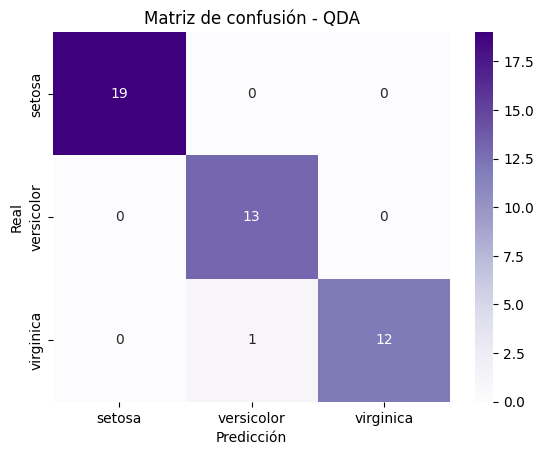

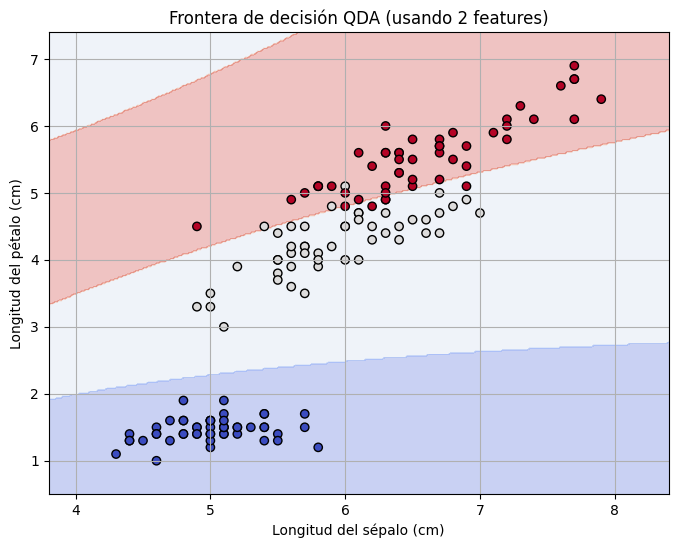

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Cargar datos (solo 2 características para visualización 2D)
iris = load_iris()
X = iris.data[:, [0, 2]]  # Longitud del sépalo y del pétalo
y = iris.target

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modelo QDA (entrenado solo con 2 features)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# 4. Predicciones
y_pred = qda.predict(X_test)

# 5. Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo QDA: {accuracy:.2f}")

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Purples", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - QDA")
plt.show()

# 7. Visualización 2D de la frontera de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = qda.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.title("Frontera de decisión QDA (usando 2 features)")
plt.grid(True)
plt.show()